In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import statsmodels.api as sm
%matplotlib widget

In [33]:
data = pd.read_csv('TTLCON.csv', index_col = 0, parse_dates = True)

In [34]:
data.tail()

,TTLCON
DATE,
2023-10-01,181226.0
2023-11-01,172449.0
2023-12-01,158205.0
2024-01-01,149238.0
2024-02-01,148904.0


## Trend

In [35]:
data['TTLCON'].index.freq = 'MS'

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.49144D+00    |proj g|=  3.16036D-02

At iterate    5    f=  9.47458D+00    |proj g|=  1.49193D-03

At iterate   10    f=  9.42307D+00    |proj g|=  1.59249D-02

At iterate   15    f=  9.39353D+00    |proj g|=  1.67627D-04

At iterate   20    f=  9.39346D+00    |proj g|=  2.67322D-03

At iterate   25    f=  9.38148D+00    |proj g|=  5.80524D-02


 This problem is unconstrained.



At iterate   30    f=  9.17924D+00    |proj g|=  4.11986D-02

At iterate   35    f=  9.12136D+00    |proj g|=  1.52011D-02

At iterate   40    f=  9.11911D+00    |proj g|=  9.92042D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     56      1     0     0   9.920D-06   9.119D+00
  F =   9.1191142860688927     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


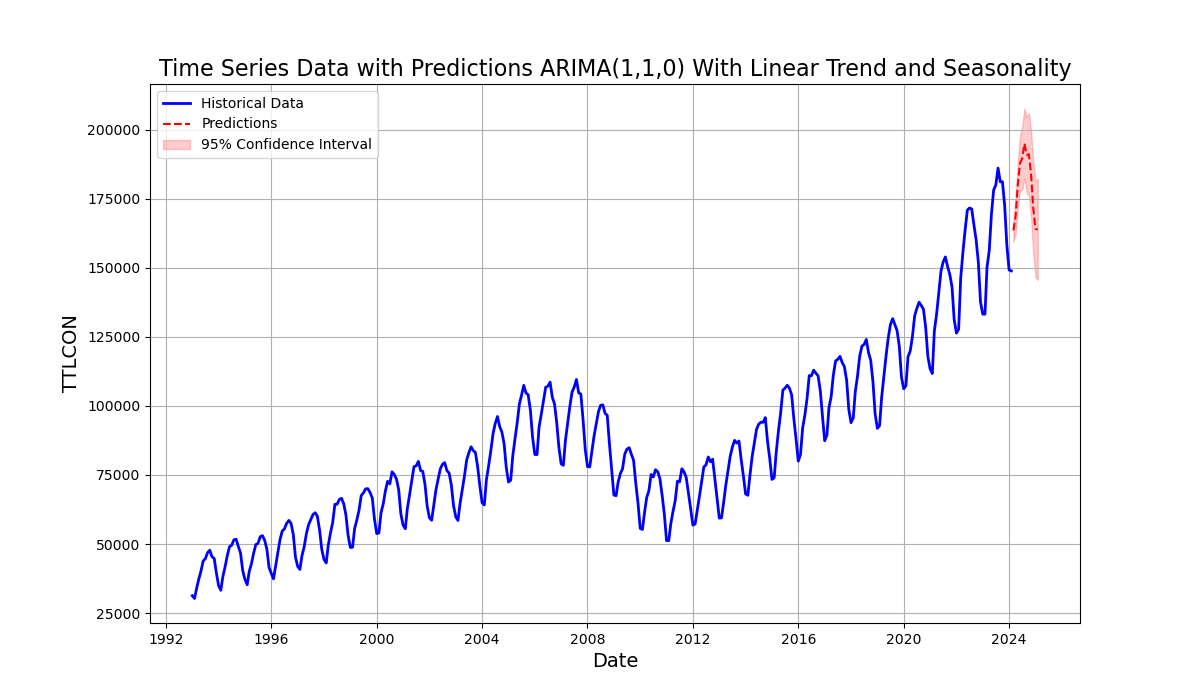

In [36]:
model=sm.tsa.statespace.SARIMAX(data['TTLCON'],order=(1, 1, 0), 
                                seasonal_order=(1, 0, 0, 12), trend = 't')
results=model.fit()
preds_df = (results.get_forecast(steps = 12)
            .summary_frame(alpha=0.05))
# Plotting the original data and the predictions with confidence intervals
plt.figure(figsize=(12, 7))

# Original data
plt.plot(data.index, data['TTLCON'], label='Historical Data', color='blue', linewidth=2)

# Predictions
plt.plot(preds_df.index, preds_df['mean'], label='Predictions', color='red', linestyle='--')

# Confidence intervals
plt.fill_between(preds_df.index, preds_df['mean_ci_lower'], preds_df['mean_ci_upper'], color='red', alpha=0.2, label='95% Confidence Interval')

# Beautifying the plot
plt.title('Time Series Data with Predictions ARIMA(1,1,0) With Linear Trend and Seasonality', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('TTLCON', fontsize=14)
plt.grid(True)
plt.legend()

plt.show()

In [37]:
import pmdarima as pm

In [14]:
df_copy = data.copy()
w = 100
predictions = np.array([])

for i in range(len(data)-24, len(data)):
    model = pm.auto_arima(data[0:i], 
                      m=12,               # frequency of series                      
                      seasonal=True,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=12, max_q=12, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    df_copy.loc[model.predict(1).index, 'arima_pred'] = model.predict(1).iloc[0]


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=5847.021, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5866.446, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5858.253, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5855.147, Time=0.16 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=5853.889, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5857.165, Time=0.07 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=5848.108, Time=0.63 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=5851.749, Time=0.79 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=5847.318, Time=0.72 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5853.025, Time=0.29 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=5847.471, Time=2.15 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=5847.649, Time=0.23 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=5846.476, Time=0.82 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5858.314, Time=0.12 sec
 ARIMA(0,1,1)(2,1,1

KeyboardInterrupt: 

In [ ]:
df_copy

In [ ]:
((df_copy['TTLCON'] - df_copy['arima_pred']).dropna()**2).mean()

## Machine Learning Example

In [24]:
data = pd.read_csv('TTLCON.csv', index_col = 0, parse_dates = True)

In [25]:
# Add Target variable
data['Y'] = data['TTLCON'].diff()
data['Y_lag'] = data['TTLCON'].shift()

# add a seasonal lag
data['s_Y'] = data['TTLCON'].shift(12)

# Adding some features
data['change'] = data['TTLCON'].diff().shift()
data['S_change'] = data['change'].shift(12) 

# Add in monthly dummies
# Extracting month from the DataFrame's index
data['Month'] = data.index.month

# Creating dummy variables for the months
month_dummies = pd.get_dummies(data['Month'], prefix='Month')

# Joining the dummy variables back to the original DataFrame
data_with_dummies = data.join(month_dummies)
data_with_dummies.drop('Month', axis = 1, inplace = True)

# Add in linear trend
data_with_dummies['t'] = np.arange(1, len(data)+1)
data_with_dummies['t2'] = np.arange(1, len(data)+1)**2
data_with_dummies.dropna(inplace = True)

In [26]:
Y = data_with_dummies['Y']
X = data_with_dummies.iloc[:,2:]

In [27]:
Y.tail()

DATE
2023-10-01      103.0
2023-11-01    -8777.0
2023-12-01   -14244.0
2024-01-01    -8967.0
2024-02-01     -334.0
Name: Y, dtype: float64

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=500, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X, Y)

RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)

In [30]:

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=1163, min_samples_split=2, min_samples_leaf=2, max_depth = 10, bootstrap = True)
 
# Fit the regressor with x and y data
regressor.fit(X, Y)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=1163)

In [31]:

predictions = np.array([])
df_copy['ml_pred'] = np.NaN
for i in range(len(X)-24, len(X)):
    regressor = RandomForestRegressor(n_estimators=1163, min_samples_split=2, min_samples_leaf=2, max_depth = 10, bootstrap = True)
    regressor.fit(X.iloc[:i], Y[:i])
    df_copy.loc[X.iloc[i].name, 'ml_pred'] = df_copy.loc[X.iloc[i-1].name,'TTLCON'] + regressor.predict(X.iloc[i:i+1])[0]



In [ ]:
feature_names = X.columns
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [17]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    regressor, X, Y, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

NameError: name 'regressor' is not defined

In [352]:
#df_copy.to_csv('example1.csv')

In [16]:
df_copy = pd.read_csv('example1.csv', index_col = 0, parse_dates = True)

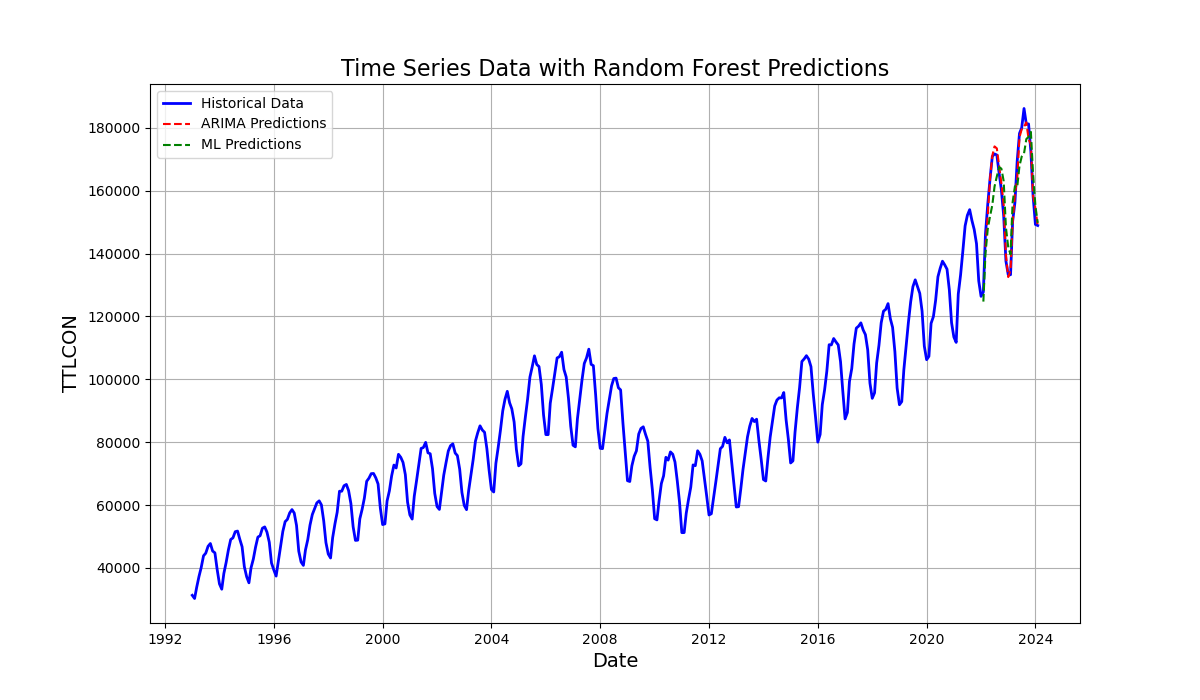

In [18]:
# Plotting the original data and the predictions with confidence intervals
plt.figure(figsize=(12, 7))

# Original data|
plt.plot(df_copy['TTLCON'], label='Historical Data', color='blue', linewidth=2)

# Predictions
plt.plot(df_copy['arima_pred'], label='ARIMA Predictions', color='red', linestyle='--')
plt.plot(df_copy['ml_pred'], label='ML Predictions', color='green', linestyle='--')


# Confidence intervals
#plt.fill_between(preds_df.index, preds_df['mean_ci_lower'], preds_df['mean_ci_upper'], color='red', alpha=0.2, label='95% Confidence Interval')

# Beautifying the plot
plt.title('Time Series Data with Random Forest Predictions', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('TTLCON', fontsize=14)
plt.grid(True)
plt.legend()

plt.show()

In [19]:
((df_copy['TTLCON'][-24:] - df_copy['arima_pred'].dropna())**2).mean()

8344091.890064786

In [20]:
((df_copy['TTLCON'][-24:] - df_copy['ml_pred'].dropna())**2).mean()

71970930.09836797

In [21]:
8344091.890064786 < 71970930.09836797

True